# Regressão Linear
- Conceito basico: 
A Regressão Linear tenta encontrar a melhor linha reta que descreva a relação entre uma variavel dependente(a que queremos prever) e uma ou mais variaveis independentes(as que usamos para fazer a previsão)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [14]:
X = np.array([0,1,2,3])
y = np.array([0,1,2,3])
# Leitura dos dados

In [15]:
def predict (alpha, beta, X):
    return alpha * X + beta

Text(0, 2.9, 'Alpha=1 e Beta = 0')

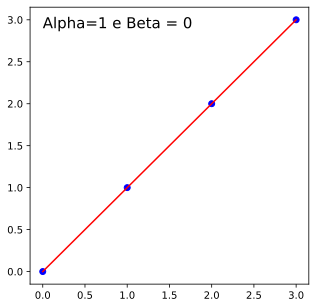

In [20]:
alpha = 1# Inclinação
beta = 0

z = predict(alpha=alpha, beta=beta,X=X)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,z,'r')
plt.text(0,2.90,f"Alpha={alpha} e Beta = {beta}", fontdict={'size':15})



__Calculando utilizando minimos quadrados__

In [2]:
X = np.array([0,1,2,3])
y = np.array([0,1,2,3])
# Leitura dos dados

In [3]:
#Criar função para calcular alpha e beta
def calcula_coeficiente (X,y):
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    numeros = np.sum((X - mean_x) * (y - mean_y))
    denominador = np.sum((X - mean_x) ** 2 )
    alpha = numeros / denominador
    beta = mean_y - ( alpha * mean_x)
    return alpha, beta


In [4]:
alpha, beta = calcula_coeficiente(X,y)#calcular alpha e beta

def predict(alpha,beta,X):
    return alpha * X + beta#Função de predição
 
z = predict(alpha=alpha,beta=beta,X=X)#calcula linha de predição

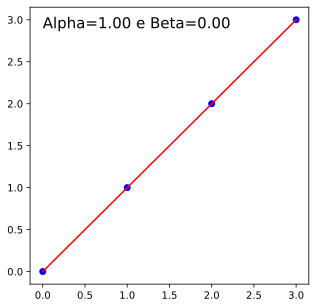

In [5]:
#Plot
fig , ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y,c='b',label = 'Dados')
ax.plot(X,z,'r',label='Linha de Regressão')
ax.text(0, 2.90, f"Alpha={alpha:.2f} e Beta={beta:.2f}", fontdict={'size':15})

plt.show()


__Avaliando modelo de regressão__

In [24]:
from sklearn import metrics
import numpy as np
y_real=np.array([1,2,3,4])
y_exemp=np.array([1,2,3,5])

__Erro Médio Absoluto (MAE - Mean Absolute Error)__
- Calcula o erro absoluto medio entre valores preditos e rais


In [19]:
mae = metrics.mean_absolute_error(y_real,y_exemp)
print(f"MAE: {mae}")

MAE: 0.25


__Erro Quadrático Médio (MSE - Mean Squared Error)__
- Calcula o erro previsto ao quadrado

In [17]:
mse = metrics.mean_squared_error(y_real,y_exemp)
print(f"MSE: {mse}")

MSE: 0.25


__Raiz do Erro Quadrático Médio (RMSE - Root Mean Squared Error)__
- O RMSE é a raiz quadrada do MSE. É uma métrica que está na mesma unidade dos valores previstos, facilitando a interpretação.

In [18]:
rmse = np.sqrt(metrics.mean_squared_error(y_real,y_exemp))
print(f"RMSE: {rmse}")


rmse2 = np.sqrt(mse)
print(f"RMSE: {rmse2}")

RMSE: 0.5
RMSE: 0.5


__Erro Médio Percentual Absoluto (MAPE - Mean Absolute Percentage Error)__
- O MAPE mede a precisão de um modelo de previsão, expressando o erro médio como uma porcentagem dos valores reais

In [35]:
mape = np.mean(np.abs((y_real - y_exemp) / y_real)) * 100
print(f"MAPE: {mape}%")

mape2 = metrics.mean_absolute_percentage_error(y_real,y_exemp)
print(f"MAPE: {100 * mape2:.2f}%")

MAPE: 6.25%
MAPE: 6.25%


# Aplicando conceito a pratica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:/Users/Guilherme/OneDrive/Área de Trabalho/Pratices_DataScience/aulas_pandas/kc_house_data.csv",sep=',',encoding='utf-8')
# C:\Users\Guilherme\OneDrive\Área de Trabalho\Pratices_DataScience\aulas_pandas\kc_house_data.csv

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
X = df['sqft_living'].head(50).to_list()# Feature: área da sala de estar em pés quadrados
y = df['price'].head(50).tolist()# Target: preço da casa

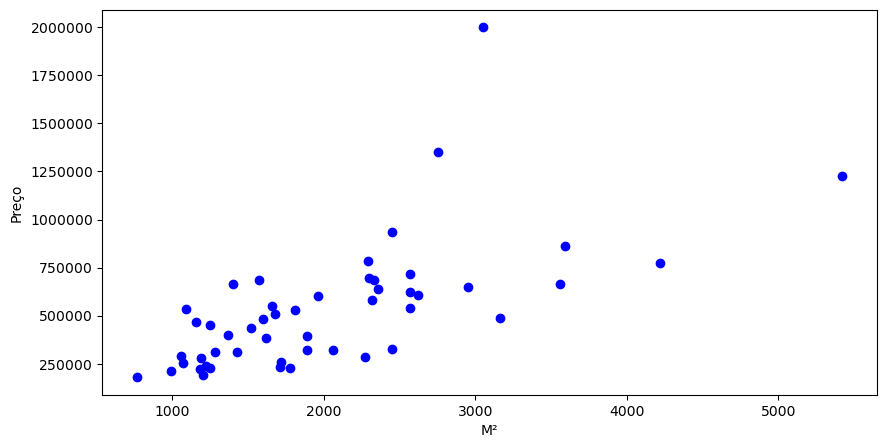

In [13]:
from matplotlib.ticker import ScalarFormatter


fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))# Ajustar o formato do eixo y para não usar notação científica
ax.ticklabel_format(style='plain', axis='y')

Redimensionar X:

- X = df['sqft_living'].head(50).values.reshape(-1, 1): 

Redimensiona X para ser uma matriz 2D com uma coluna, necessária para o modelo de regressão linear.

Verificar y:

- y = df['price'].head(50).values: 

Certifica-se de que y é um vetor 1D.



In [9]:
# Definir as variáveis independentes (features) e a variável dependente (target)
X = df['sqft_living'].head(50).values.reshape(-1,1)# Feature: área da sala de estar em pés quadrados
y = df['price'].head(50).values # Target: preço da casa

In [7]:
model = LinearRegression()# Criar um modelo de regressão linear

- model.fit(X, y):

Treina o modelo de regressão linear com os dados de entrada X e os valores alvo y.

In [10]:
model.fit(X,y)# Treinar o modelo com os dados

LinearRegression()

- y_pred = model.predict(X):

Usa o modelo treinado para fazer previsões sobre X.

In [11]:
y_pred = model.predict(X)

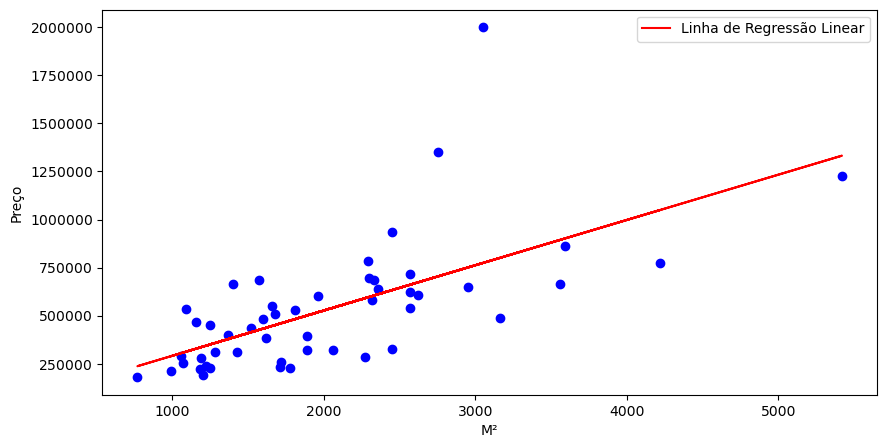

In [14]:

from matplotlib.ticker import ScalarFormatter


fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))# Ajustar o formato do eixo y para não usar notação científica
ax.ticklabel_format(style='plain', axis='y')

plt.plot(X,y_pred, color = 'red',label='Linha de Regressão Linear')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import numpy as np
mse = metrics.mean_squared_error(y,y_pred)
print(f"MSE: {mse}")
mape = mean_absolute_percentage_error(y, y_pred) * 100
print(f"MAPE: {mape:.2f}%")
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
print(f"RMSE: {rmse}")


MSE: 62185849719.2222
MAPE: 33.76%
RMSE: 249370.90792476616
